<a href="https://colab.research.google.com/github/dGabo-jr/CURSOS-DE-PYTHON/blob/main/REGRESI%C3%93N_LINEAL_SIMPLE_OTRO_EJEMPLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
housing

{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave  None      Reg   
 1        2          20       RL         80.0     9600   Pave  None      Reg   
 2        3          60       RL         68.0    11250   Pave  None      IR1   
 3        4          70       RL         60.0     9550   Pave  None      IR1   
 4        5          60       RL         84.0    14260   Pave  None      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave  None      Reg   
 1456  1457          20       RL         85.0    13175   Pave  None      Reg   
 1457  1458          70       RL         66.0     9042   Pave  None      Reg   
 1458  1459          20       RL         68.0     9717   Pave  None      Reg   
 1459  1460          20       RL         75.0     9937   Pave  None      Reg   
 
      LandContour Utilities  .

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
dfhousing=pd.DataFrame(housing.data, columns= housing.feature_names)
dfhousing.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,1,2008,WD,Normal


In [6]:
#analizando los datos
dfhousing.shape


(1460, 80)

In [7]:
housing.DESCR  #PARA CONOCER LOS TITULOS DE LAS COLUMNAS

"Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.\n\nWith 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.\n\nMSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD

In [8]:
dfhousing["Precio_medio"]= housing.target  #añadimos una columna nueva
dfhousing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Precio_medio
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [9]:
#hacer limpieza de datos
dfhousing.isnull().sum()  # verificamos si tienen valores nulos

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Precio_medio       0
Length: 81, dtype: int64

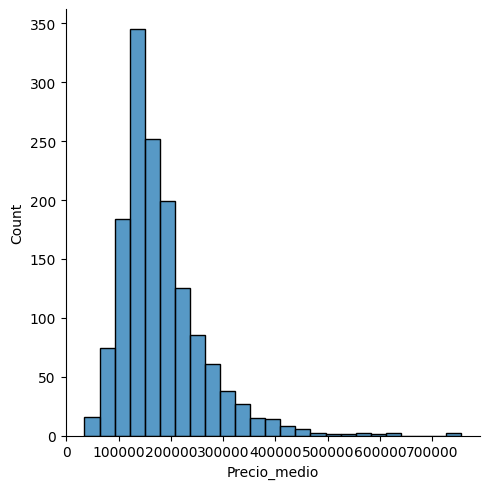

In [10]:
# ahora veremos los datos en graficos para mejor entendimiento
sns.displot(dfhousing["Precio_medio"], bins = 25)  # creación de un histograma
plt.show()

In [11]:
#veamos ahora la matriz de correlación a través de los valores correlación de pearson Estan entre 1 y -1, mide la relación lineal entre las variables si aumenta o disminuyen ambos la correlación es positiva y si una disminuye y la otra aumenta o viceversa es una correlación negativa, sirve para ver la fuerza y dirección de las 2 variables
correlation_matrix_casas = dfhousing.corr().round(2)
correlation_matrix_casas

<ipython-input-11-0acb0008d609>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_casas = dfhousing.corr().round(2)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Precio_medio
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,...,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,...,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,...,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,...,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,...,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,...,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,...,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,...,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,...,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,...,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


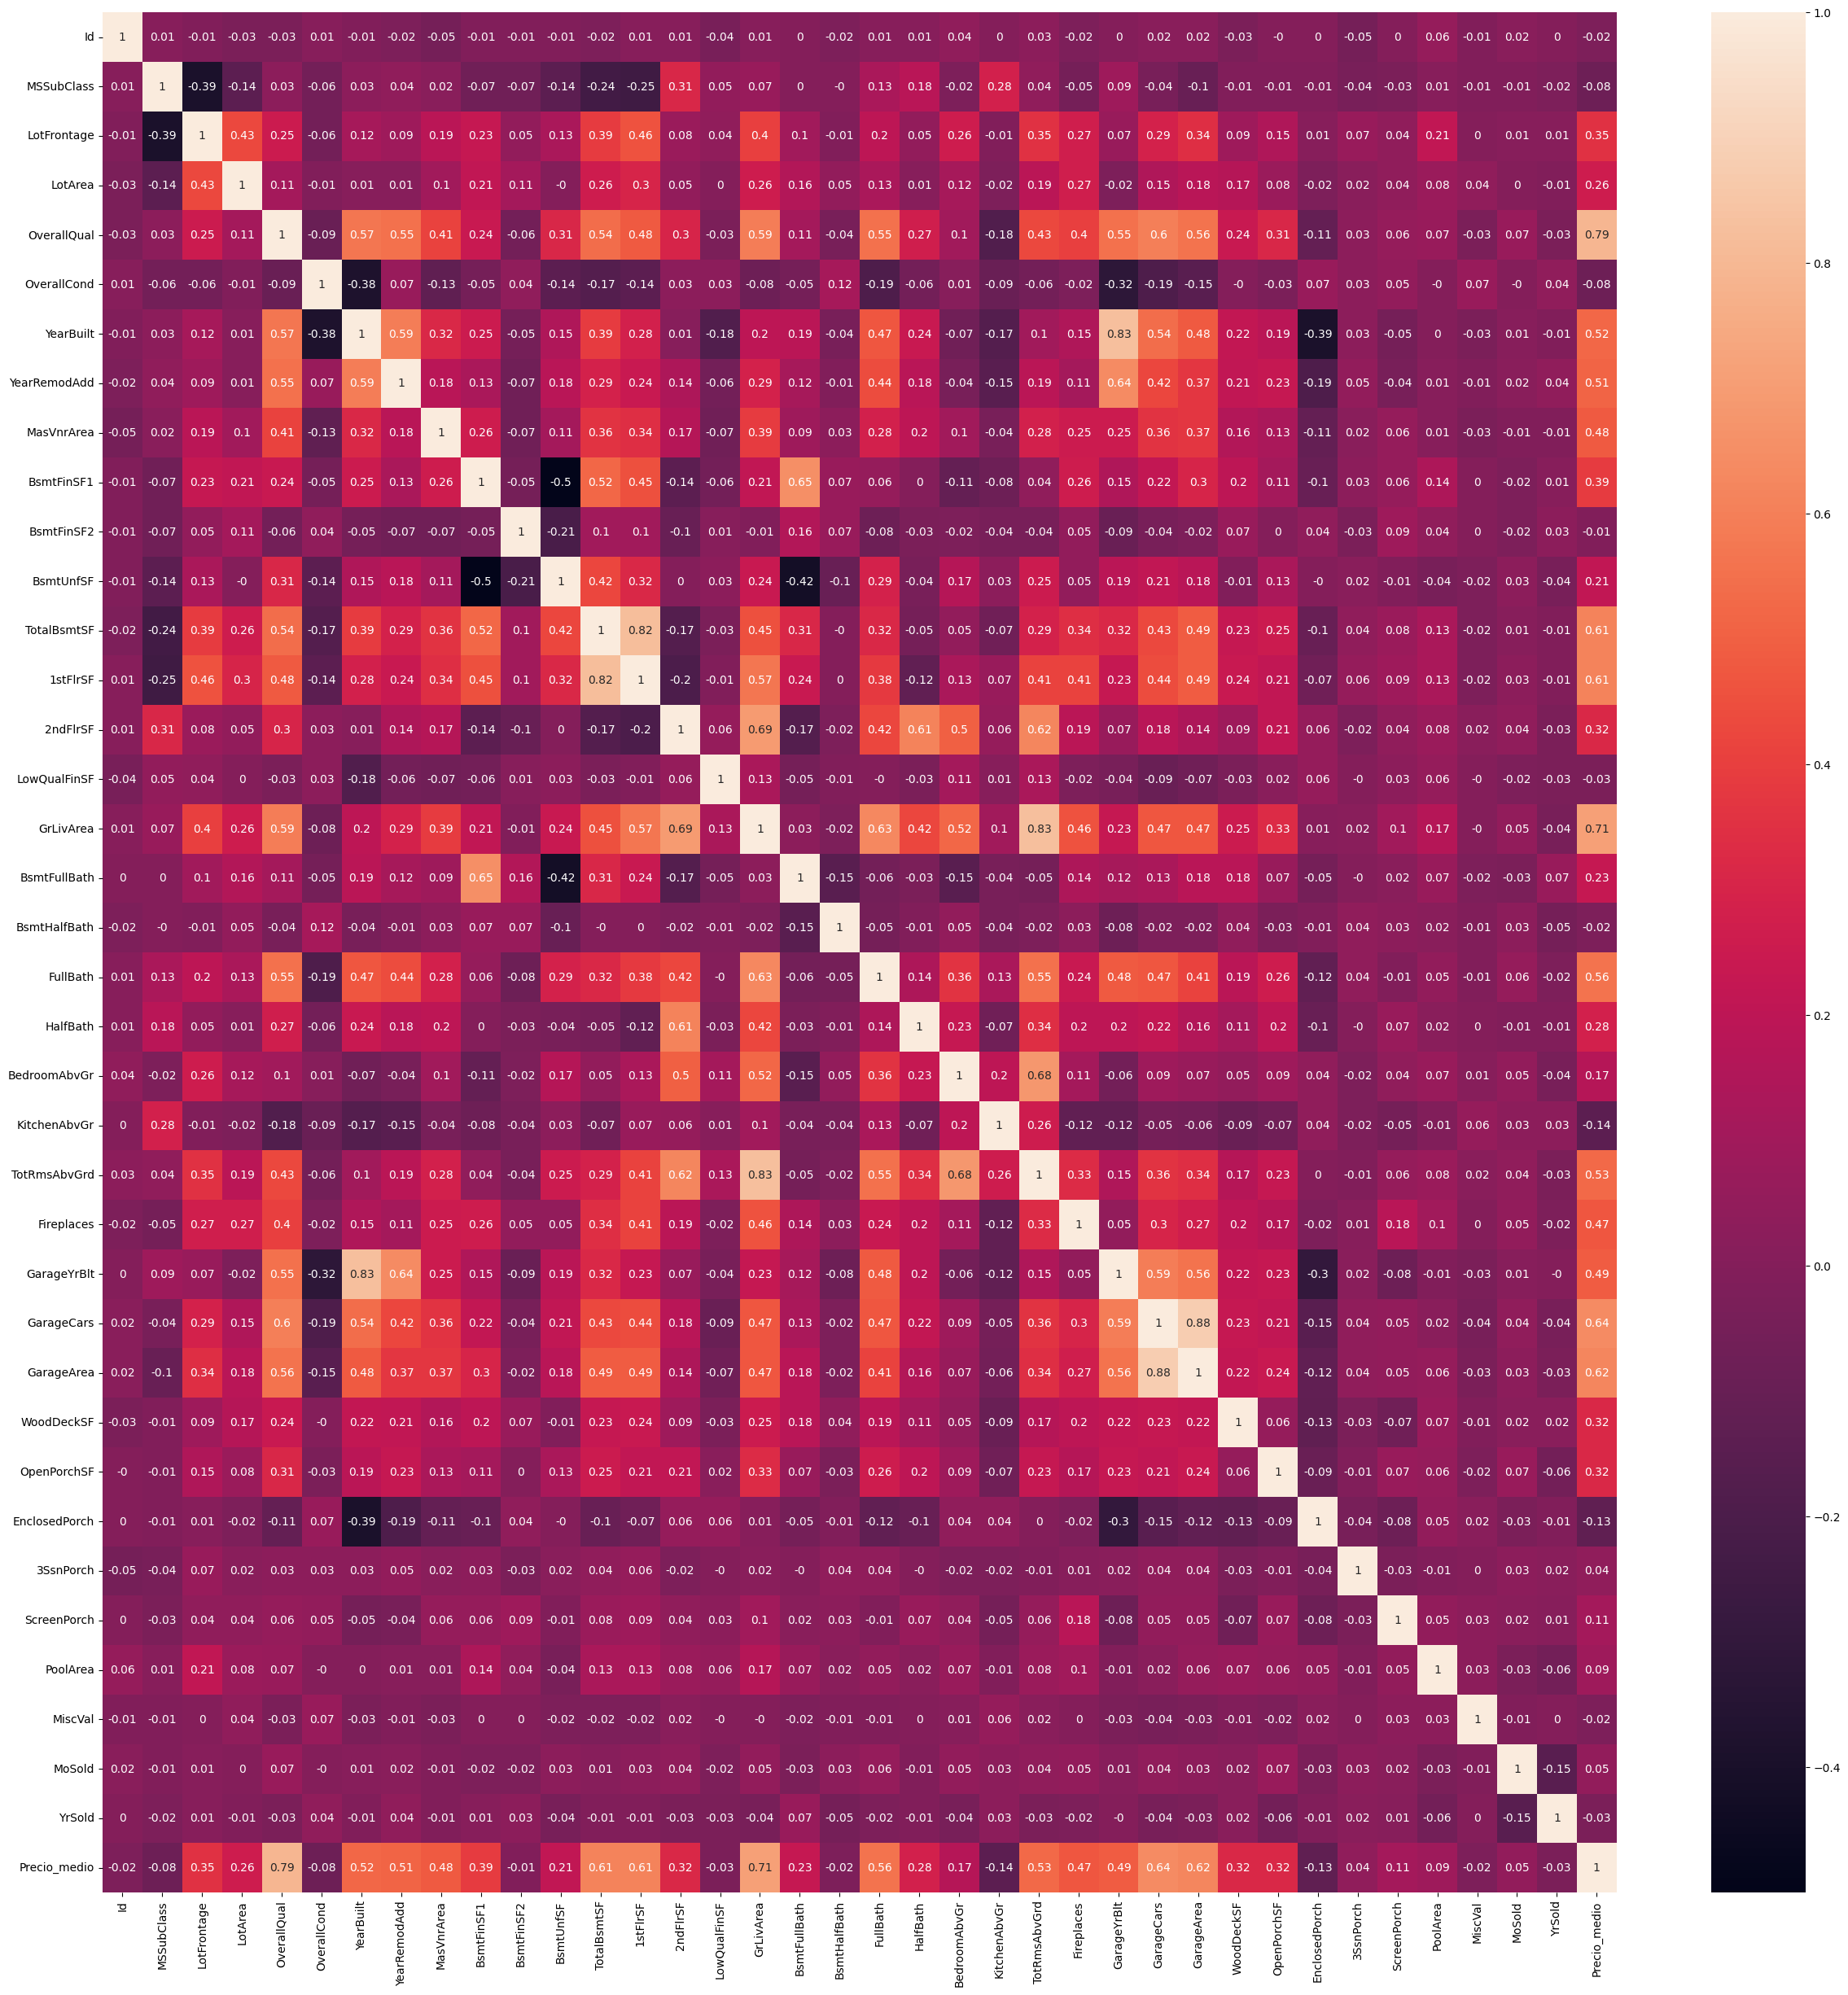

In [13]:
# GrLivArea, OverallQual y Precio_medio
#analizando los mismo datos a través de un mapa de calor
sns.heatmap(data=correlation_matrix_casas,annot=True)
plt.rcParams["figure.figsize"] =(30,30)

plt.show()

##**OverallQual:** Califica el material y acabado general de la casa


   10	Muy Excelente

   9	Excelente
   
   8	Muy Bueno
   
   7	Bueno
   
   6	Por Encima del Promedio
   
   5	Promedio
   
   4	Por Debajo del Promedio
   
   3	Justo
   
   2	Pobre
   
   1	Muy Pobre





#**GrLivArea:** Área cuadrada habitable por encima del nivel del suelo (planta baja) en pies cuadrados.








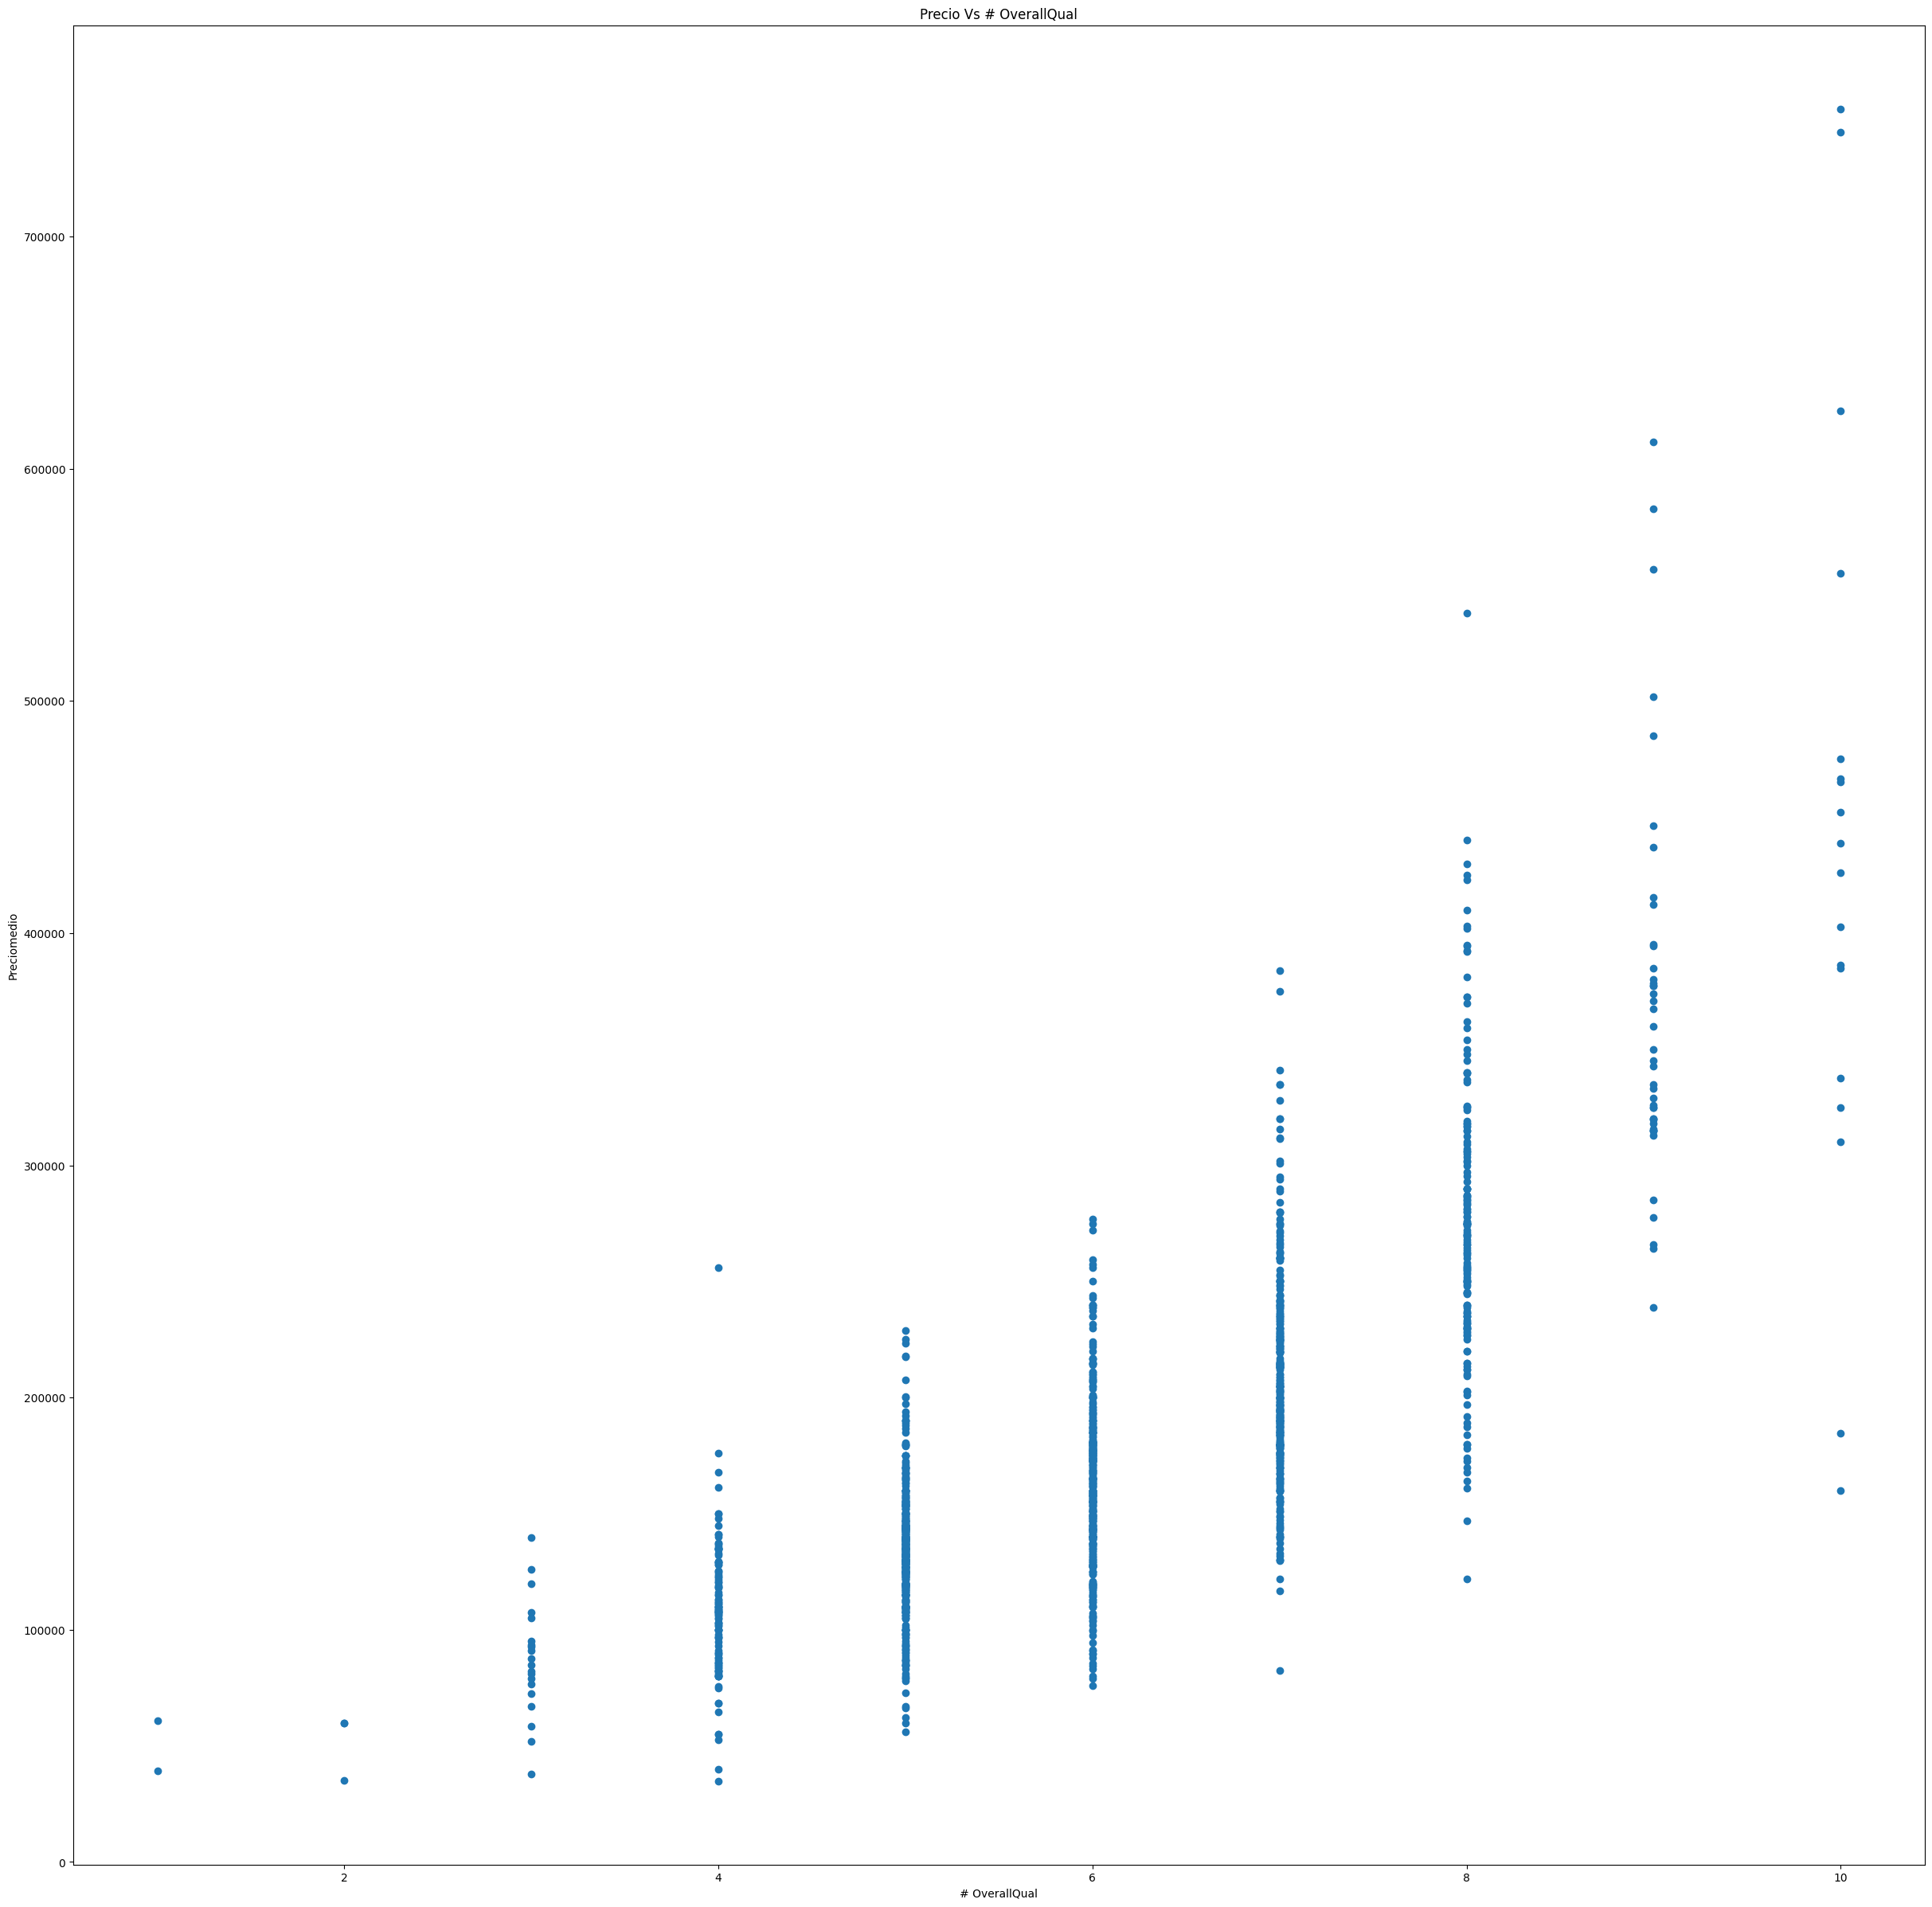

In [14]:
# analisis de exploración de datos a traves de conocer como influye el precio con el numero de habitaciones
plt.scatter(dfhousing ["OverallQual"], dfhousing ["Precio_medio"])

plt.title("Precio Vs # OverallQual")
plt.xlabel ("# OverallQual")
plt.ylabel ("Preciomedio")

plt.rcParams["figure.figsize"] =(5,5) #para hacer más grande o mas chico el mapa 



plt.show()

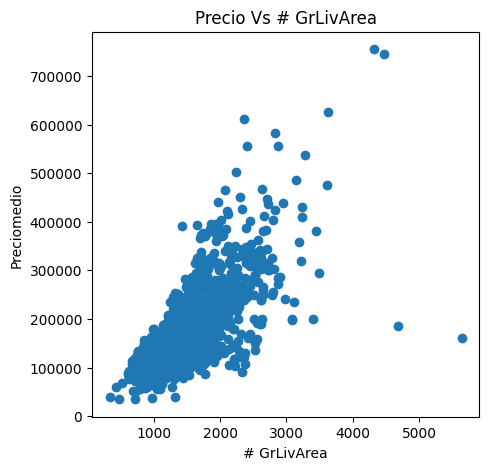

In [15]:
# analisis de exploración de datos a traves de conocer como influye el precio con el numero de habitaciones
plt.scatter(dfhousing ["GrLivArea"], dfhousing ["Precio_medio"])

plt.title("Precio Vs # GrLivArea")
plt.xlabel ("# GrLivArea")
plt.ylabel ("Preciomedio")

plt.rcParams["figure.figsize"] =(5,5) #para hacer más grande o mas chico el mapa 


In [16]:
print("Maximo valor {}".format(dfhousing["Precio_medio"].max()))
print("Minimo valor {}".format(dfhousing["Precio_medio"].min()))
print("valor medio {}".format(dfhousing["Precio_medio"].mean()))
print(" valor mediana {}".format(dfhousing["Precio_medio"].median()))
print ("Desviación standar {}".format (dfhousing["Precio_medio"].std()))


Maximo valor 755000
Minimo valor 34900
valor medio 180921.19589041095
 valor mediana 163000.0
Desviación standar 79442.50288288662


In [17]:
#Creación del modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# division de los datos (en de entrenamiento del 75 al 80%) y (de prueba del 20 al 25%) 

X_area_const= dfhousing["OverallQual"]
y_costo_promedio= dfhousing["Precio_medio"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_area_const, y_costo_promedio,test_size= 0.2, random_state = 42)
print("Núm de datos de entrenamiento Experiencia:  ", X_train.shape)#datos de entranamiento experiencia
print("Núm de datos de prueba Experiencia:  ",X_test.shape)# datos de testeo experiencia
print("Núm de datos de entrenamiento Salario:  ",y_train.shape)  #datos de entranamiento salario
print("Núm de datos de prueba Salario:  ",y_test.shape) # datos de testeo salario
X_train =X_train.values.reshape(-1,1)  # una vez que lo hemos corrido ya no es necesario usarlo de nuevo por eso se deja en comentario


Núm de datos de entrenamiento Experiencia:   (1168,)
Núm de datos de prueba Experiencia:   (292,)
Núm de datos de entrenamiento Salario:   (1168,)
Núm de datos de prueba Salario:   (292,)


In [18]:

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)  #apliclamos el metodo de regresión linial a los datos de entrenamiento

LinearRegression()

In [20]:
print ("Coefficients: \n", lin_model.coef_)
print ("Independent term: \n", lin_model.intercept_)

Coefficients: 
 [44379.87767098]
Independent term: 
 -90233.22290028064


In [22]:
#evaluando el modelo a través del coheficiente de determinación
from sklearn.metrics import r2_score
#X_test =X_test.values.reshape(-1,1)  # una vez que lo hemos corrido ya no es necesario usarlo de nuevo por eso se deja en comentario

#datos de entrenamiento
y_train_predict = lin_model.predict(X_train)
r2 = r2_score(y_train, y_train_predict)
print ("The model performance for training set")
print ("-----------------------------------")
print ("R2 score is {}".format(r2))


The model performance for training set
-----------------------------------
R2 score is 0.6170962665508342


In [25]:
predicted_data = lin_model.predict (dfhousing[["OverallQual"]])
predicted_data [0:5]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([220425.9207966 , 176046.04312562, 220425.9207966 , 220425.9207966 ,
       264805.79846758])

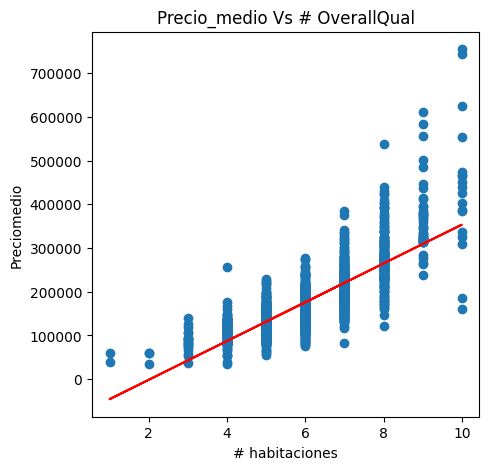

In [26]:
# analisis de exploración de datos a traves de conocer como influye el precio con el numero de habitaciones
plt.scatter(dfhousing ["OverallQual"], dfhousing ["Precio_medio"])

plt.plot(dfhousing["OverallQual"],predicted_data, color = "red" )

plt.title("Precio_medio Vs # OverallQual")
plt.xlabel ("# habitaciones")
plt.ylabel ("Preciomedio")

plt.rcParams["figure.figsize"] =(5,5) #para hacer más grande o mas chico el mapa 



plt.show()

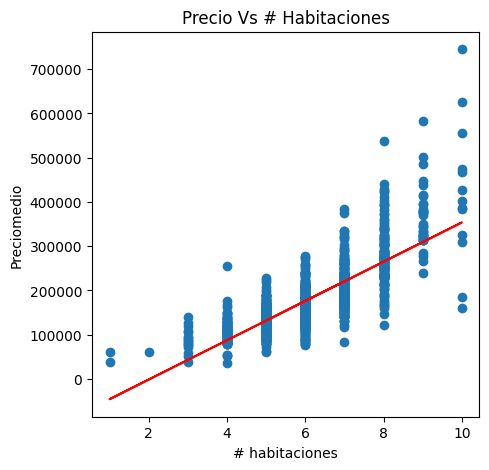

In [28]:
plt.scatter(X_train, y_train)

plt.plot(dfhousing["OverallQual"],predicted_data, color = "red" )

plt.title("Precio Vs # Habitaciones")
plt.xlabel ("# habitaciones")
plt.ylabel ("Preciomedio")

plt.rcParams["figure.figsize"] =(5,5) #para hacer más grande o mas chico el mapa 



plt.show()

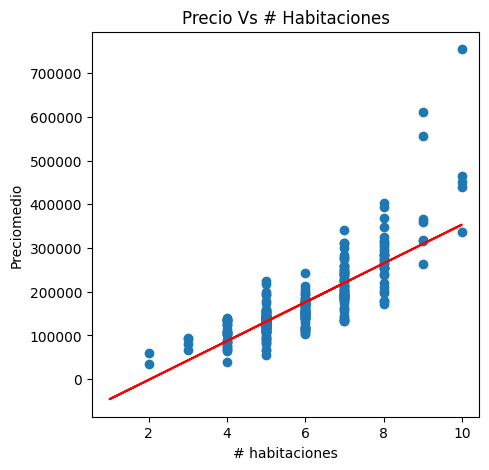

In [29]:
plt.scatter(X_test, y_test)

plt.plot(dfhousing["OverallQual"],predicted_data, color = "red" )

plt.title("Precio Vs # Habitaciones")
plt.xlabel ("# habitaciones")
plt.ylabel ("Preciomedio")

plt.rcParams["figure.figsize"] =(5,5) #para hacer más grande o mas chico el mapa 



plt.show()

In [30]:
# comparación de datos actuales y predicción

dfAP =pd.DataFrame({"Actual":dfhousing["Precio_medio"], "Predicción":predicted_data})
dfAP.head(10)

,Actual,Predicción
0,208500,220425.920797
1,181500,176046.043126
2,223500,220425.920797
3,140000,220425.920797
4,250000,264805.798468
5,143000,131666.165455
6,307000,264805.798468
7,200000,220425.920797
8,129900,220425.920797
9,118000,131666.165455


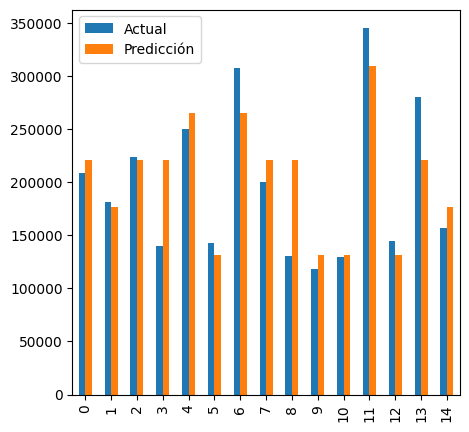

In [31]:
#mostrando en imagen la prediccion versus actual

dfAP.head(15).plot(kind="bar")
plt.show()